jurisdiction  Carlsbad  Chula Vista  Coronado  Del Mar  El Cajon  Encinitas  \
year_built                                                                    
2015             181.0        362.0       7.0     21.0       NaN       51.0   
2016             514.0       1792.0      22.0      NaN      39.0      234.0   
2017             259.0       1416.0       3.0      1.0       9.0      100.0   
2018             294.0       1752.0       4.0      1.0       9.0      118.0   
2019             271.0       3647.0       3.0      NaN       7.0       44.0   

jurisdiction  Escondido  Imperial Beach  La Mesa  Lemon Grove  National City  \
year_built                                                                     
2015                NaN             NaN      NaN          NaN            NaN   
2016              512.0             2.0     79.0         66.0           98.0   
2017              466.0             NaN     40.0         10.0           64.0   
2018              466.0             NaN     40

<IPython.core.display.Javascript object>


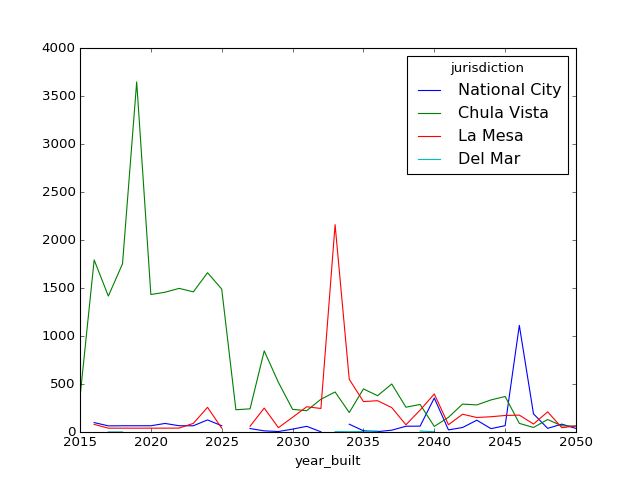

In [37]:
%matplotlib nbagg

from sqlalchemy import create_engine
from pysandag.database import get_connection_string
import pandas as pd
import os
import models as md
import yaml
import math
import numpy as np
from urbansim_defaults import datasources
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

urbansim_engine = create_engine(get_connection_string("configs/dbconfig.yml", 'urbansim_database'))

buildings_sql = '''SELECT  name as Jurisdiction, year_built, sum(new_units)
  FROM urbansim_output.buildings b
      INNER JOIN ref.jurisdiction j
      ON b.jurisdiction_id = j.jurisdiction_id
    WHERE scenario_id = 211
      GROUP BY name, year_built
      ORDER BY name, year_built
'''
buildings_df = pd.read_sql(buildings_sql, urbansim_engine)

buildings_df = buildings_df.pivot(index='year_built', columns='jurisdiction', values='sum')
print buildings_df.head()

df = buildings_df[['National City', 'Chula Vista', 'La Mesa', 'Del Mar']]

df.plot()

In [ ]:
%matplotlib nbagg

from sqlalchemy import create_engine
from pysandag.database import get_connection_string
import pandas as pd
import os
import models as md
import yaml
import math
import numpy as np
from urbansim_defaults import datasources
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

urbansim_engine = create_engine(get_connection_string("configs/dbconfig.yml", 'urbansim_database'))

buildings_sql = '''SELECT name, avg(max_profit_orig/ total_cost) as avg_roi
  FROM urbansim_output.feasibility F
  LEFT JOIN urbansim.parcels p
  ON f.parcel_id = p.parcel_id
  INNER JOIN ref.jurisdiction j
      ON p.jurisdiction_id = j.jurisdiction_id
    WHERE scenario_id = 211
      GROUP BY name
      ORDER BY name	
'''
buildings_df = pd.read_sql(buildings_sql, urbansim_engine, index_col='name')

ax = buildings_df.plot.bar()
ax.set_xlabel("Jurisdiction",fontsize=12)
ax.set_ylabel("Average return on investment",fontsize=12)
